# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length']=df['title'].str.len()
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [4]:
# Calcula media, mediana y moda de la columna 'title_length'
tlenght_media=df['title_length'].mean()
tlenght_mediana=df['title_length'].median()
tlenght_moda=df['title_length'].mode()
print(f'Media de title_length = {tlenght_media}')
print(f'Mediana de title_length = {tlenght_mediana}')
print(f'Moda de title_length = {tlenght_moda}')

Media de title_length = 15.481103166496425
Mediana de title_length = 14.0
Moda de title_length = 0    12
Name: title_length, dtype: int64


In [5]:
# Método resumido (cálculo extra, de prueba).
df['title_length'].describe()

count    979.000000
mean      15.481103
std        8.491569
min        1.000000
25%       10.000000
50%       14.000000
75%       19.000000
max       68.000000
Name: title_length, dtype: float64

In [6]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
tlenght_var=df['title_length'].var()
tlenght_devstd=df['title_length'].std()
tlenght_rango=df['title_length'].max()-df['title_length'].min()
print(f'Varianza de title_length = {tlenght_var}')
print(f'Desviación Estándar de title_length = {tlenght_devstd}')
print(f'Rango de title_length = {tlenght_rango}')

Varianza de title_length = 72.1067488840288
Desviación Estándar de title_length = 8.491569282766807
Rango de title_length = 67


In [7]:
# Calcula asimetría y curtosis de la columna 'title_length'
tlenght_asimetria = df['title_length'].skew()
tlenght_curtosis = df['title_length'].kurt()
print(f'Asimetría de title_length = {tlenght_asimetria}')
print(f'Curtosis de title_length = {tlenght_curtosis}')

Asimetría de title_length = 1.5252523464631278
Curtosis de title_length = 3.8122887061291544


In [8]:
# Imprime el título más corto y el título más largo según su longitud.
# Fila con el título más Largo
max_long=df['title_length'].idxmax()
max_largo_titulo=df.loc[max_long,'title']
print(f'El título más largo es {max_largo_titulo}')

El título más largo es Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


In [9]:
# Fila con el título más corto.
min_long=df['title_length'].idxmin()
min_largo_titulo=df.loc[min_long, 'title']
print(f'El título más corto es {min_largo_titulo}')

El título más corto es M


In [10]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


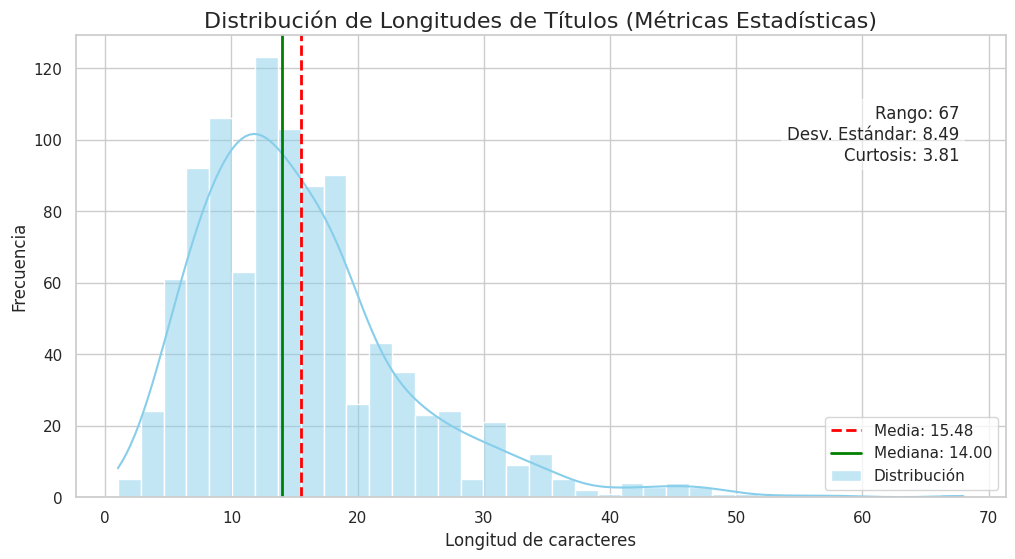

In [11]:
# grafica tus resultados
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['title_length'], kde=True, color="skyblue", label="Distribución")
plt.axvline(tlenght_media, color='red', linestyle='--', linewidth=2, label=f'Media: {tlenght_media:.2f}')
plt.axvline(tlenght_mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {tlenght_mediana:.2f}')
#df['title_length'].tlenght_moda()[0]
stats_text = (f'Rango: {tlenght_rango}\n'
              f'Desv. Estándar: {tlenght_devstd:.2f}\n'
              f'Curtosis: {tlenght_curtosis:.2f}')
plt.gca().text(0.95, 0.85, stats_text, transform=plt.gca().transAxes, 
               fontsize=12, verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title('Distribución de Longitudes de Títulos (Métricas Estadísticas)', fontsize=16)
plt.xlabel('Longitud de caracteres')
plt.ylabel('Frecuencia')
plt.legend()

#sns.histplot(df['title_length'], kde=True)
#plt.axvline()



---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [29]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
tlength_sample = df["title_length"].sample(n=5, random_state=42)
tlength_list = tlength_sample.tolist()
print(tlength_sample)
f'Los valores de longitud seleccionados como muestra son: {tlength_list}'

199    22
543    19
174     7
929    15
66     19
Name: title_length, dtype: int64


'Los valores de longitud seleccionados como muestra son: [22, 19, 7, 15, 19]'

In [19]:
# Calcula la media de los 5 valores
tlength_sample_med = sum(tlength_list)/len(tlength_list)
f'La media de la muestra tomada es de {tlength_sample_med} caracteres'

'La media de la muestra tomada es de 16.4 caracteres'

In [28]:
# Calcula las diferencias al cuadrado con respecto a la media
tlenght_sample_sqdif = [(x - tlength_sample_med)**2 for x in tlength_sample]
f'La diferencia al cuadrado de la muestra respecto a la media es la lista: {tlenght_sample_sqdif}'

'La diferencia al cuadrado de la muestra respecto a la media es la lista: [31.360000000000017, 6.760000000000008, 88.35999999999997, 1.959999999999996, 6.760000000000008]'

In [25]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
tlenght_sample_var = sum(tlenght_sample_sqdif)/(len(tlength_sample)-1)
# Se resta 1 a la longitud de la lista porque es una muestra.
f'La varianza de la muestra es {tlenght_sample_var:.2f}'

'La varianza de la muestra es 33.80'

In [26]:
tlenght_sample_devstd = np.sqrt(tlenght_sample_var)
f'La desviación estándar de la muestra es {tlenght_sample_devstd:.2f}'

'La desviación estándar de la muestra es 5.81'